# 4   Writing Structured Programs

In [2]:
import nltk

In [6]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.5:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in
  9  26.85% that
 10  27.71% is
 11  28.55% was
 12  29.31% for
 13  30.08% ``
 14  30.83% ''
 15  31.46% The
 16  32.06% with
 17  32.64% it
 18  33.22% as
 19  33.78% he
 20  34.34% his
 21  34.89% on
 22  35.44% be
 23  35.92% ;
 24  36.36% I
 25  36.80% by
 26  37.24% had
 27  37.67% at
 28  38.07% ?
 29  38.45% not
 30  38.83% are
 31  39.19% from
 32  39.54% or
 33  39.88% this
 34  40.22% have
 35  40.52% an
 36  40.83% which
 37  41.12% --
 38  41.41% were
 39  41.67% but
 40  41.92% He
 41  42.17% her
 42  42.42% one
 43  42.66% they
 44  42.90% you
 45  43.13% all
 46  43.36% would
 47  43.58% him
 48  43.80% their
 49  44.02% been
 50  44.23% )
 51  44.44% (
 52  44.65% has
 53  44.84% will
 54  45.03% who
 55  45.21% more
 56  45.39% out
 57  45.56% It
 58  45.73% we
 59  45.90% she
 60  46.07% said
 61  46.23% there
 62  46.39% up
 63  46.55% In
 64  46.70

In [8]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm) + 1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

In [10]:
def size(s):
    return 1 + sum(size(child) for child in s.hyponyms())
from nltk.corpus import wordnet as wn
car = wn.synset('car.n.01')
size(dog)

42

In [11]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [12]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [21]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

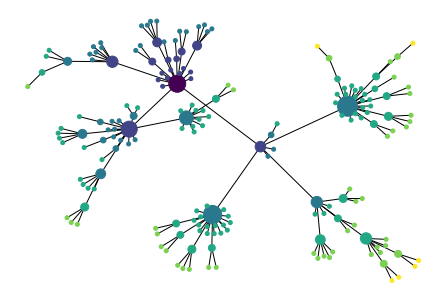

In [26]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)